# Allele Fixation by Genetic Drift

This code attempts to simulate a part of results from Buri's experiment on genetic drift (Buri, 1956) and illustrate how drift can lead to fixation.

We start with 100 populations, each comprising 8 males and 8 females. All the individuals are heterozygous, with genotype A1A2. Almost assumptions of Hardy-Weinberg Equilibrium stand, except that there is genetic drift. Every generation, one male mates with one random female. Each pair produces 4 male and 4 females offspring. The genotype of every male offspring corresponds to one of the genotypes in the Punnett square of mating between the parents, and same applies to the female offspring. Out of the offspring of all the pairs, 8 males and 8 females are randomly selected for next generation. This continues for several generations. In about 20 generations, we observe that a large proportion of the populations have reached an A1 allele frequency of $0$ or $1$. 
This happens because $p=0$ and $p=1$ are attracting states for the allele freqeuncy, as it cannot change once it has reached one of the two states. Since individuals are chosen randomly for next generation, homozygotes of either kind can be in majority. A population with more A1A1 individuals will tend to produce more individuals with allele A1, and similarly for A2. As this continues over generations, populations tend to go to either of the extreme states of allele frequency, with either A1 or A2 being fixed.

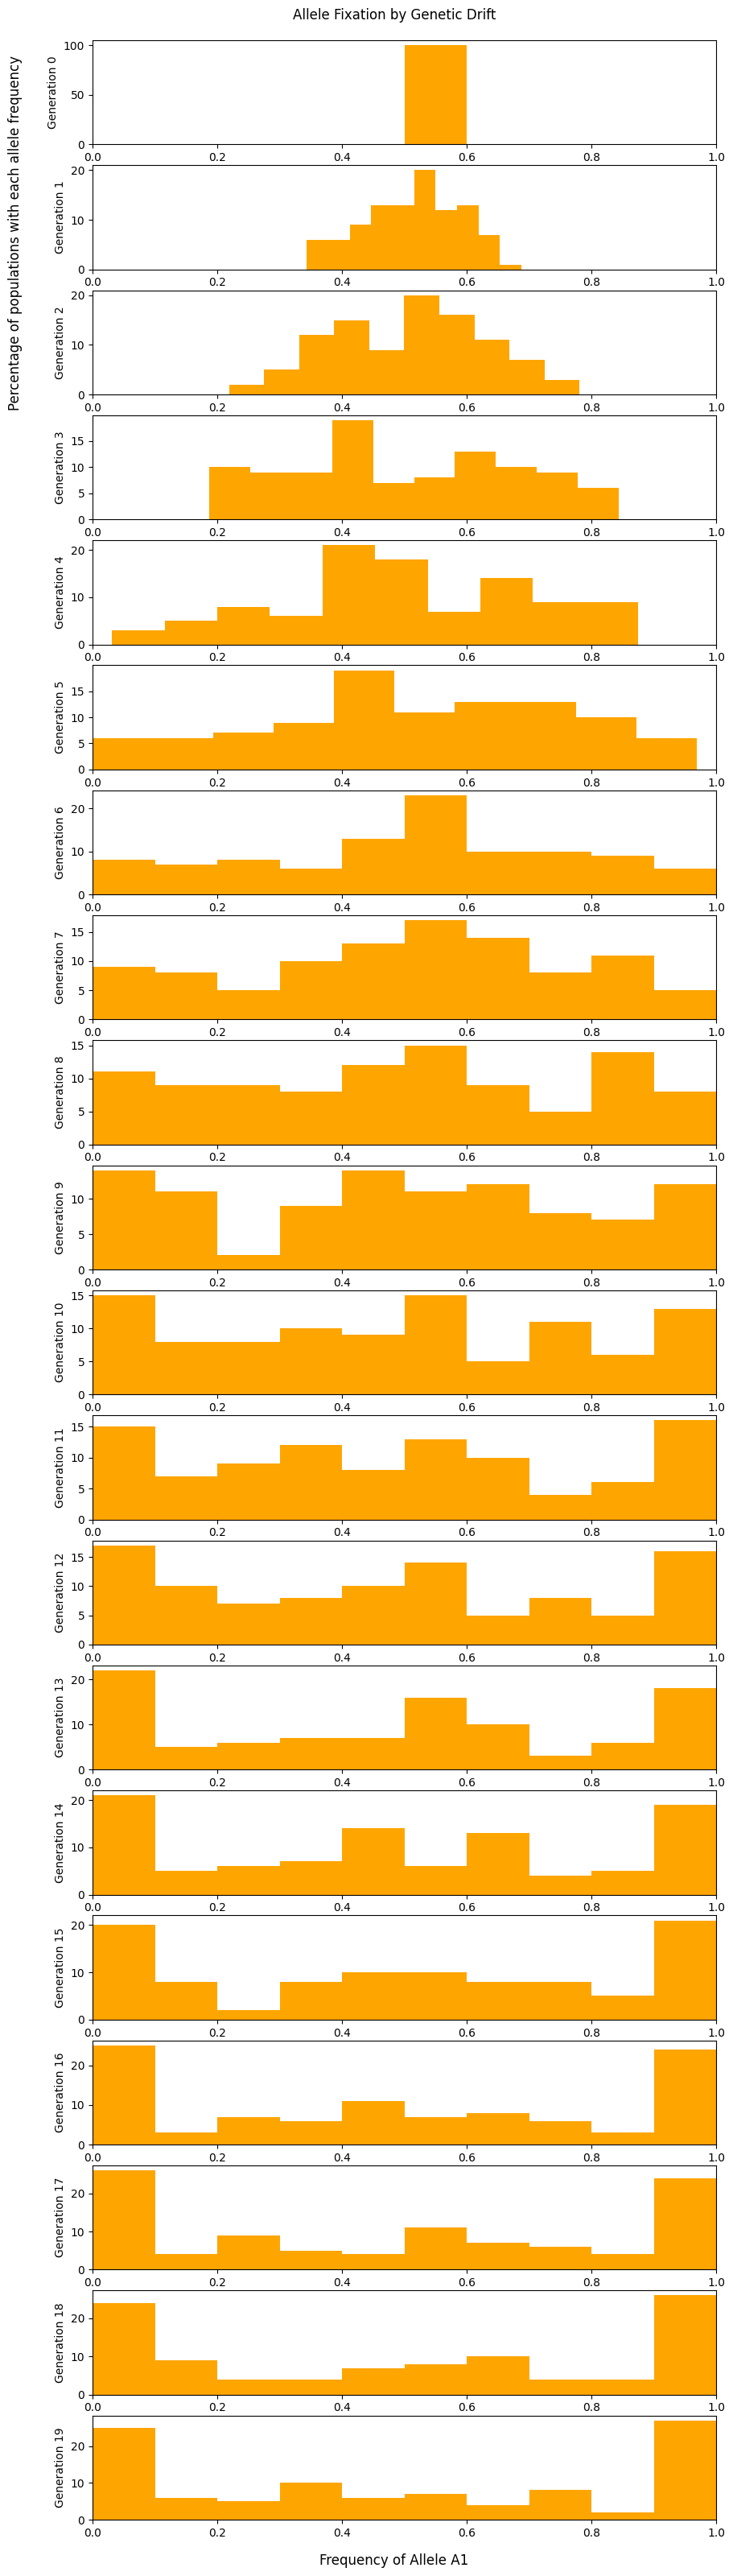

In [9]:
import random
import matplotlib.pyplot as plt 


# Though this organism is called 'Fly' here, it doesn't matter coz this is 'beanbag genetics'
class Fly:

    males = []
    females = []

    def __init__(self, alleles, is_male):
        self.alleles = alleles
        self.is_male = is_male

    
    @staticmethod
    def frequency_A1():
        
        freq_A1A1 = (sum(fly.alleles.count('A1') == 2 for fly in Fly.males) \
                     + sum(fly.alleles.count('A1') == 2 for fly in Fly.females))/(len(Fly.males)+len(Fly.females))
        freq_A1A2 = (sum(fly.alleles.count('A1') == 1 for fly in Fly.males) \
                     + sum(fly.alleles.count('A1') == 1 for fly in Fly.females))/(len(Fly.males)+len(Fly.females))
        
        return freq_A1A1 + freq_A1A2/2
    

    @staticmethod
    def reproduce():

        male_offspring = []
        female_offspring = []

        # Randomly pair up males and females and list the offspring they produce

        for i in range(len(Fly.males)):

            random.shuffle(Fly.males)
            random.shuffle(Fly.females)
            
            dad = Fly.males[i]
            mom = Fly.females[i]

            if dad.alleles.count('A1') == 2 and mom.alleles.count('A1') == 2:
                male_offspring.extend([Fly(['A1', 'A1'], True), Fly(['A1', 'A1'], True), Fly(['A1', 'A1'], True), Fly(['A1', 'A1'], True)])
                female_offspring.extend([Fly(['A1', 'A1'], False), Fly(['A1', 'A1'], False), Fly(['A1', 'A1'], False), Fly(['A1', 'A1'], False)])

            elif dad.alleles.count('A1') == 0 and mom.alleles.count('A1') == 0:
                male_offspring.extend([Fly(['A2', 'A2'], True), Fly(['A2', 'A2'], True), Fly(['A2', 'A2'], True), Fly(['A2', 'A2'], True)])
                female_offspring.extend([Fly(['A2', 'A2'], False), Fly(['A2', 'A2'], False), Fly(['A2', 'A2'], False), Fly(['A2', 'A2'], False)])

            elif (dad.alleles.count('A1') == 2 and mom.alleles.count('A1') == 0) or (dad.alleles.count('A1') == 0 and mom.alleles.count('A1') == 2):
                male_offspring.extend([Fly(['A1', 'A2'], True), Fly(['A1', 'A2'], True), Fly(['A1', 'A2'], True), Fly(['A1', 'A2'], True)])
                female_offspring.extend([Fly(['A1', 'A2'], False), Fly(['A1', 'A2'], False), Fly(['A1', 'A2'], False), Fly(['A1', 'A2'], False)])
            
            elif (dad.alleles.count('A1') == 2 and mom.alleles.count('A1') == 1) or (dad.alleles.count('A1') == 1 and mom.alleles.count('A1') == 2):
                male_offspring.extend([Fly(['A1', 'A1'], True), Fly(['A1', 'A1'], True), Fly(['A1', 'A2'], True), Fly(['A1', 'A2'], True)])
                female_offspring.extend([Fly(['A1', 'A1'], False), Fly(['A1', 'A1'], False), Fly(['A1', 'A2'], False), Fly(['A1', 'A2'], False)])

            elif (dad.alleles.count('A1') == 1 and mom.alleles.count('A1') == 0) or (dad.alleles.count('A1') == 0 and mom.alleles.count('A1') == 1):
                male_offspring.extend([Fly(['A1', 'A2'], True), Fly(['A1', 'A2'], True), Fly(['A2', 'A2'], True), Fly(['A2', 'A2'], True)])
                female_offspring.extend([Fly(['A1', 'A2'], False), Fly(['A1', 'A2'], False), Fly(['A2', 'A2'], False), Fly(['A2', 'A2'], False)])
            
            elif (dad.alleles.count('A1') == 1 and mom.alleles.count('A1') == 1) or (dad.alleles.count('A1') == 1 and mom.alleles.count('A1') == 1):
                male_offspring.extend([Fly(['A1', 'A1'], True), Fly(['A1', 'A2'], True), Fly(['A1', 'A2'], True), Fly(['A2', 'A2'], True)])
                female_offspring.extend([Fly(['A1', 'A1'], False), Fly(['A1', 'A2'], False), Fly(['A1', 'A2'], False), Fly(['A2', 'A2'], False)])
        
        # Randomly choose individuals for next generation
        Fly.males = random.sample(male_offspring, 8)
        Fly.females = random.sample(female_offspring, 8)


REPLICATES = 100
GENERATIONS = 20
frequency = [[0 for _ in range(REPLICATES)] for k in range (GENERATIONS)]


for population in range(REPLICATES):

    # Initialise the population with 8 males and 8 females
    Fly.males = [Fly(['A1', 'A2'], True) for _ in range(8)]
    Fly.females = [Fly(['A1', 'A2'], False) for _ in range(8)]

    # Evolve over several generations
    for i in range(GENERATIONS):
        frequency[i][population] = Fly.frequency_A1()
        Fly.reproduce()


# Plot the results 
fig, ax = plt.subplots(GENERATIONS, 1, figsize=(10, 40))
fig.supxlabel('Frequency of Allele A1', y=0.095)
fig.supylabel('Percentage of populations with each allele frequency', y = 0.82)
fig.suptitle('Allele Fixation by Genetic Drift', y = 0.89)

for i in range(GENERATIONS):
    ax[i].hist(frequency[i], color='orange')
    ax[i].set_xlim(0,1)
    ax[i].set_ylabel(f'Generation {i}')

plt.show()

Reference: Buri, P. (1956). Gene Frequency in Small Populations of Mutant Drosophila. Evolution, 10(4), 367. doi:10.2307/2406998 